In [24]:
import pandas as pd
df=pd.read_csv('/content/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [25]:
import math
test_med=math.floor(df['test_score(out of 10)'].median())
test_med

8

In [26]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(test_med)
df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [27]:
df['experience']=df['experience'].fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [28]:
pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from word2number import w2n
w2n.word_to_num("ten")


10

In [30]:
def convertw2n(x):
  return w2n.word_to_num(x)

In [31]:
df['experience']=df['experience'].apply(convertw2n)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


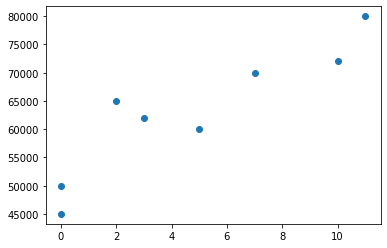

In [32]:
import matplotlib.pyplot as plt
plt.scatter(df['experience'],df['salary($)'])


In [33]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
x=df.drop('salary($)',axis=1)
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,8.0,7
7,11,7.0,8


In [34]:
y=df['salary($)']
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [37]:
reg.fit(x,y)
import warnings
warnings.filterwarnings("ignore")

In [38]:
reg.predict([[3,5,8]])

array([53046.57933042])

In [39]:
reg.score(x,y)

0.9616780002577959

In [41]:
reg.intercept_

17737.263464337688

In [42]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [43]:
import pickle
with open('salarydectmodel','wb') as f:
  pickle.dump(reg,f)